<a href="https://colab.research.google.com/github/VithuJey/KNN_on_breast_cancer_wisconsin_data/blob/master/KNN_on_breast_cancer_wisconsin_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/breast-cancer-wisconsin-data/data.csv"
data_set = pd.read_csv(path)

In [0]:
data_set.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [0]:
data_set.columns

In [8]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# Data Processing
data_set.drop(['Unnamed: 32', 'id', ], axis = 1, inplace=True) 
print(data_set.shape)

(569, 31)


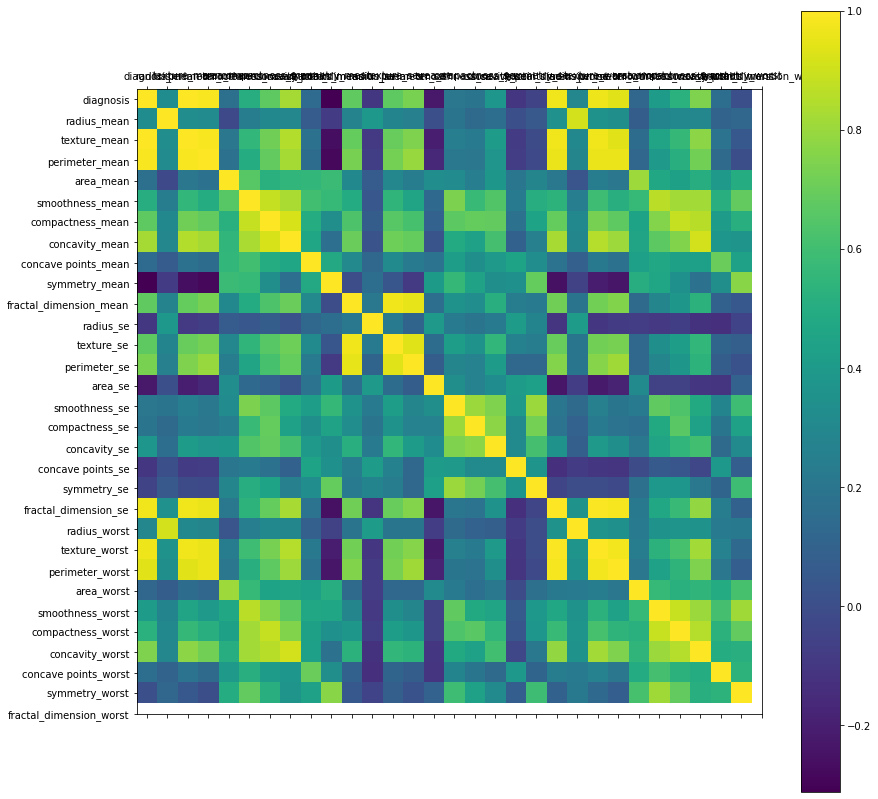

In [10]:
# Understanding the data with visualization
rcParams['figure.figsize'] = 20, 14 
plt.matshow(data_set.corr()) 
plt.yticks(np.arange(data_set.shape[1]), data_set.columns) 
plt.xticks(np.arange(data_set.shape[1]), data_set.columns) 
plt.colorbar()

In [0]:
data_set.hist()

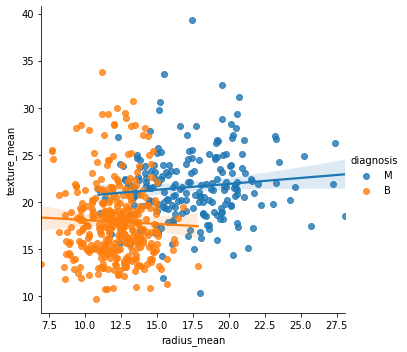

In [11]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = data_set)

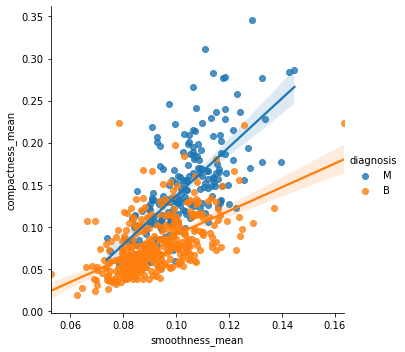

In [0]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', hue = 'diagnosis', data = data_set) 

Text(0.5, 1.0, 'Diagnosis Class Distribution')

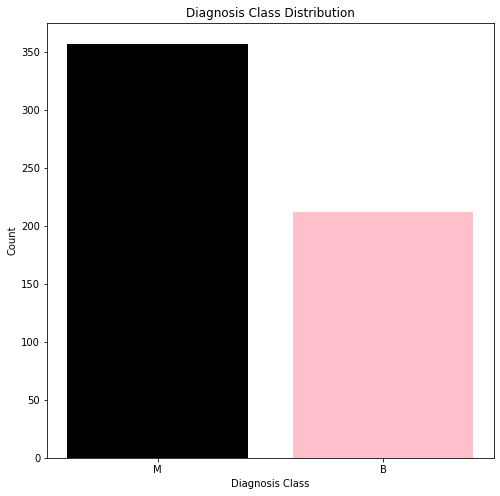

In [12]:
rcParams['figure.figsize'] = 8,8
plt.bar(data_set['diagnosis'].unique(), data_set['diagnosis'].value_counts(), color = ['black', 'pink'])
plt.xticks([0, 1])
plt.xlabel('Diagnosis Class')
plt.ylabel('Count')
plt.title('Diagnosis Class Distribution')

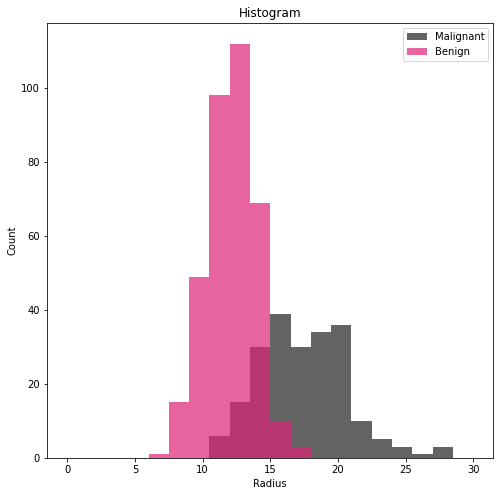

In [13]:
fig, ax = plt.subplots(sharey=True)
m = ax.hist(data_set[data_set["diagnosis"] == "M"].radius_mean, bins=20, range=(0, 30), label = "Malignant", alpha=0.7, color='#232121')
b = ax.hist(data_set[data_set["diagnosis"] == "B"].radius_mean, bins=20, range=(0, 30), label = "Benign", alpha=0.7, color='#df2378')
plt.xlabel("Radius")
plt.ylabel("Count")
plt.title("Histogram")
plt.legend()
plt.show()

In [0]:
# Data Processing
# data_set.drop(['Unnamed: 32', 'id'], axis = 1, inplace=True) 
# print(data_set.shape)

In [0]:
def define_diagnosis_value(diagnosis): 
    if diagnosis == 'M': 
        return 1
    else: 
        return 0
  
data_set['diagnosis'] = data_set['diagnosis'].apply(define_diagnosis_value) 

In [0]:
standardScaler = StandardScaler()
scale_columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
data_set[scale_columns] = standardScaler.fit_transform(data_set[scale_columns])

In [0]:
# Applying KNN algorithm on the dataset
X = np.array(data_set.iloc[:, 1:]) 
y = np.array(data_set['diagnosis']) 

In [0]:
x_train, x_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.30, random_state = 0) 

In [0]:
knn_scores = []
for k in range(1,40):
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(x_train, y_train)
  knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'KNN Classifier scores with different K values')

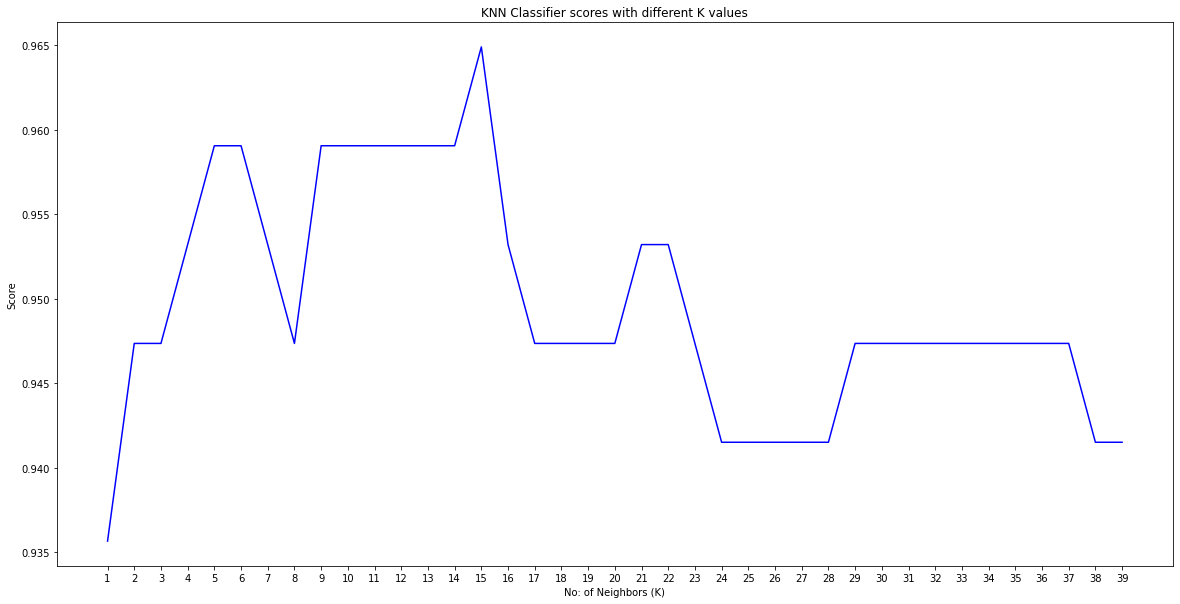

In [21]:
plt.figure(figsize = (20, 10))
plt.plot([k for k in range(1, 40)], knn_scores, color = 'blue')



plt.xticks([i for i in range(1, 40)])
plt.xlabel('No: of Neighbors (K)')
plt.ylabel('Score')
plt.title('KNN Classifier scores with different K values')


In [23]:
print("The maximum score obtained for K Neighbors Classifier is {}% with {} neighbors.".format(knn_scores[14]*100, 15))

The maximum score obtained for K Neighbors Classifier is 96.49122807017544% with 15 neighbors.


In [28]:
for i in range(0, 39):
  print("{} : {}".format((i+1), knn_scores[i]))

1 : 0.935672514619883
2 : 0.9473684210526315
3 : 0.9473684210526315
4 : 0.9532163742690059
5 : 0.9590643274853801
6 : 0.9590643274853801
7 : 0.9532163742690059
8 : 0.9473684210526315
9 : 0.9590643274853801
10 : 0.9590643274853801
11 : 0.9590643274853801
12 : 0.9590643274853801
13 : 0.9590643274853801
14 : 0.9590643274853801
15 : 0.9649122807017544
16 : 0.9532163742690059
17 : 0.9473684210526315
18 : 0.9473684210526315
19 : 0.9473684210526315
20 : 0.9473684210526315
21 : 0.9532163742690059
22 : 0.9532163742690059
23 : 0.9473684210526315
24 : 0.9415204678362573
25 : 0.9415204678362573
26 : 0.9415204678362573
27 : 0.9415204678362573
28 : 0.9415204678362573
29 : 0.9473684210526315
30 : 0.9473684210526315
31 : 0.9473684210526315
32 : 0.9473684210526315
33 : 0.9473684210526315
34 : 0.9473684210526315
35 : 0.9473684210526315
36 : 0.9473684210526315
37 : 0.9473684210526315
38 : 0.9415204678362573
39 : 0.9415204678362573
